In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns 

In [2]:
df = pd.read_csv("D:\Projects\Ml project\Fraud Prediction\data\Raw\diabetes_prediction_dataset.csv")
df.head()

<>:1: SyntaxWarning: invalid escape sequence '\P'
<>:1: SyntaxWarning: invalid escape sequence '\P'
C:\Users\behli\AppData\Local\Temp\ipykernel_20788\1749952176.py:1: SyntaxWarning: invalid escape sequence '\P'
  df = pd.read_csv("D:\Projects\Ml project\Fraud Prediction\data\Raw\diabetes_prediction_dataset.csv")


,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


<Axes: ylabel='bmi'>

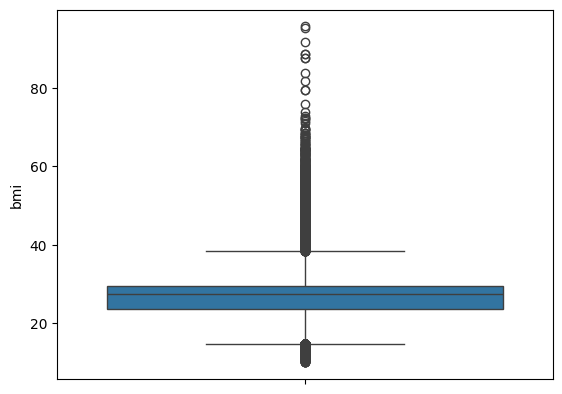

In [4]:
sns.boxplot(df['bmi'])

<Axes: ylabel='blood_glucose_level'>

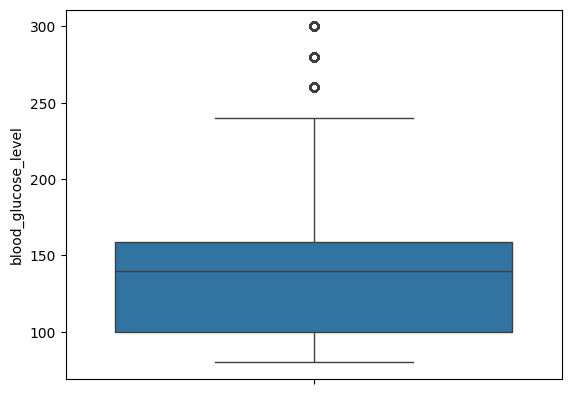

In [8]:
sns.boxplot(df['blood_glucose_level'])

In [14]:
df['heart_disease'].value_counts()

heart_disease
0    96058
1     3942
Name: count, dtype: int64

In [16]:
df['diabetes'].value_counts()

diabetes
0    91500
1     8500
Name: count, dtype: int64

([<matplotlib.patches.Wedge at 0x1f30433ef90>,
 [Text(1.0610131546864985, 0.2902603754944939, 'presence of diabetes'),
  Text(-1.0610131033598131, -0.2902605631131772, 'No presence of diabetes')],
 [Text(0.5787344480108173, 0.15832384117881484, '8.5%'),
  Text(-0.5787344200144434, -0.15832394351627846, '91.5%')])

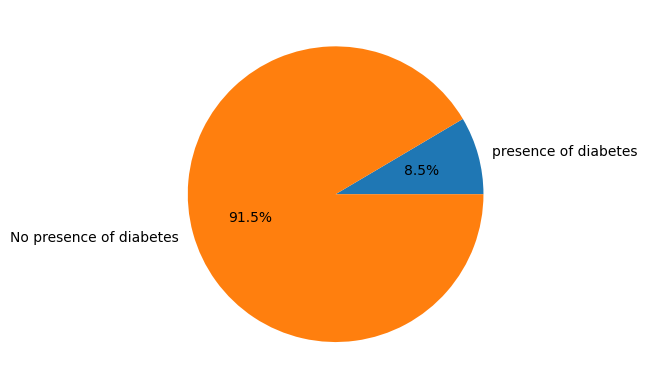

In [17]:
labels = ['presence of diabetes', 'No presence of diabetes']
values = (8500, 91500)

plt.pie(values, labels=labels, autopct='%1.1f%%')

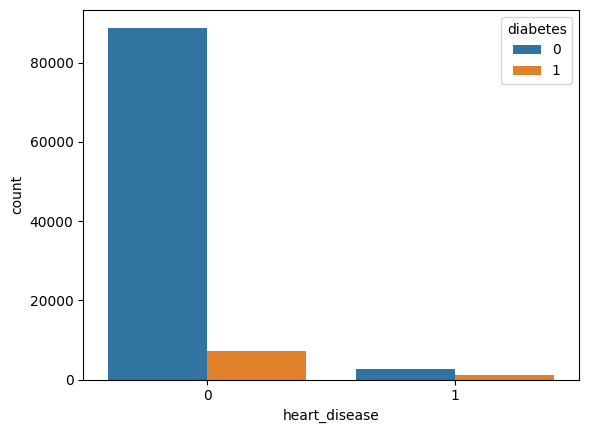

In [20]:
sns.countplot(x='heart_disease', hue='diabetes', data=df)
plt.show()


([<matplotlib.patches.Wedge at 0x1f30b8402d0>,
 [Text(0.4741027267204859, 0.9925858172048402, 'No Info'),
  Text(-1.075526862024584, -0.23074221344078352, 'never'),
  Text(0.04056145618007314, -1.0992519130174632, 'former'),
  Text(0.6412968174468805, -0.8937216523798126, 'current'),
  Text(0.988513535998691, -0.48253599777360123, 'not current'),
  Text(1.0913088245322042, -0.13800380247710206, 'ever')],
 [Text(0.2586014873020832, 0.5414104457480946, '35.8%'),
  Text(-0.586651015649773, -0.12585938914951827, '35.1%'),
  Text(0.022124430643676255, -0.5995919525549798, '9.4%'),
  Text(0.3497982640619348, -0.4874845376617159, '9.3%'),
  Text(0.5391892014538313, -0.26320145333105516, '6.4%'),
  Text(0.5952593588357477, -0.07527480135114657, '4.0%')])

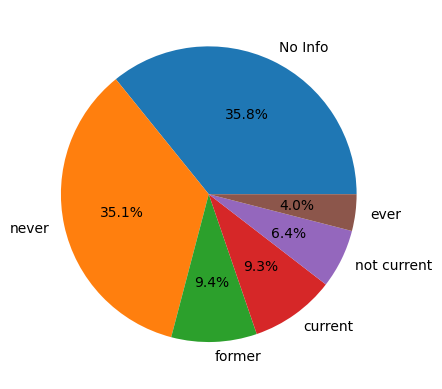

In [23]:
value_count = df['smoking_history'].value_counts()
plt.pie(value_count.values, labels=value_count.index, autopct='%1.1f%%')

<Axes: xlabel='hypertension', ylabel='count'>

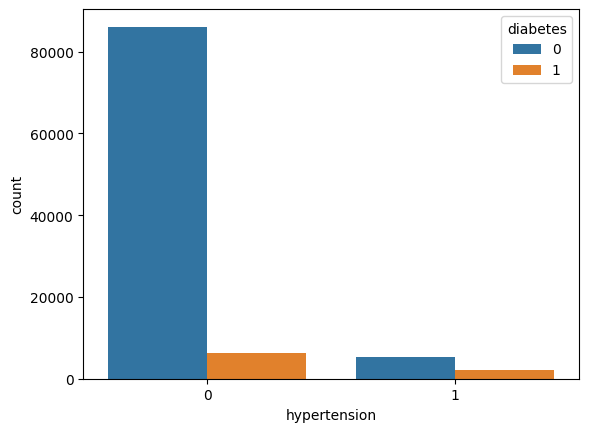

In [25]:
sns.countplot(x='hypertension', hue='diabetes', data=df)

In [35]:
df.info()

<class 'pandas.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  str    
 1   age                  100000 non-null  float64
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      100000 non-null  str    
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  float64
 8   diabetes             100000 non-null  int64  
dtypes: float64(4), int64(3), str(2)
memory usage: 6.9 MB


In [40]:
numerical_cols = [features for features in df.columns if df[features].dtype !='str']
categorical_cols = [features for features in df.columns if df[features].dtype =='str']

In [41]:
numerical_cols

['age',
 'hypertension',
 'heart_disease',
 'bmi',
 'HbA1c_level',
 'blood_glucose_level',
 'diabetes']

In [39]:
categorical_cols

['gender', 'smoking_history']

In [43]:
df[numerical_cols].corr()

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes
age,1.000000,0.251171,0.233354,0.380410,0.101354,0.102481,0.258008
hypertension,0.251171,1.000000,0.121262,0.151447,0.080939,0.078007,0.197823
heart_disease,0.233354,0.121262,1.000000,0.069390,0.067589,0.064398,0.171727
bmi,0.380410,0.151447,0.069390,1.000000,0.081466,0.083048,0.209656
HbA1c_level,0.101354,0.080939,0.067589,0.081466,1.000000,0.153530,0.400660
blood_glucose_level,0.102481,0.078007,0.064398,0.083048,0.153530,1.000000,0.386446
diabetes,0.258008,0.197823,0.171727,0.209656,0.400660,0.386446,1.000000


<Axes: >

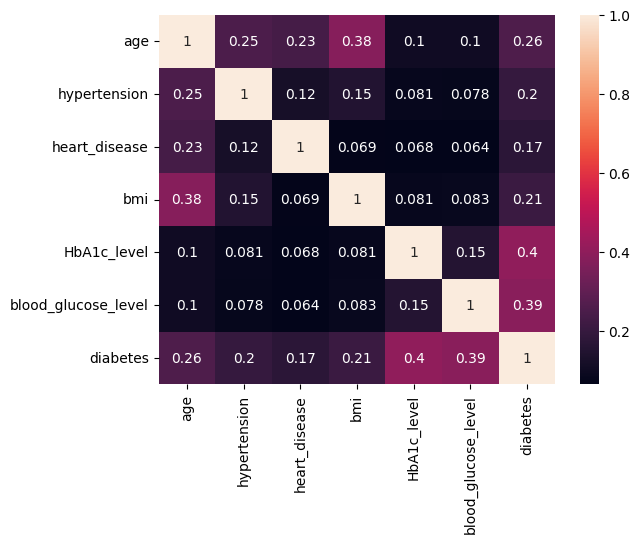

In [48]:
sns.heatmap(df[numerical_cols].corr(), annot=True)